In [1]:
import pandas as pd

transformer = pd.read_csv("eaf_transformer.csv")
temp = pd.read_csv("eaf_temp.csv")

gas = pd.read_csv("eaf_gaslance_mat.csv", nrows=50000)

print("Transformer shape:", transformer.shape)
print("Temp shape:", temp.shape)
print("Gas shape:", gas.shape)


Transformer shape: (271712, 5)
Temp shape: (85104, 4)
Gas shape: (50000, 6)


In [2]:

transformer.columns = transformer.columns.str.strip()
transformer['MW'] = transformer['MW'].astype(str).str.replace(',', '.').astype(float, errors='ignore')
transformer['STARTTIME'] = pd.to_datetime(transformer['STARTTIME'], errors='coerce')

gas.columns = gas.columns.str.strip()
gas['O2_AMOUNT'] = gas['O2_AMOUNT'].astype(str).str.replace(',', '.').astype(float, errors='ignore')
gas['GAS_AMOUNT'] = gas['GAS_AMOUNT'].astype(str).str.replace(',', '.').astype(float, errors='ignore')
gas['REVTIME'] = pd.to_datetime(gas['REVTIME'], errors='coerce')

print("Transformer cleaned:", transformer.shape)
print("Gas cleaned:", gas.shape)


C:\Users\prajw\AppData\Local\Temp\ipykernel_2184\1780061318.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gas['REVTIME'] = pd.to_datetime(gas['REVTIME'], errors='coerce')


Transformer cleaned: (271712, 5)
Gas cleaned: (50000, 6)


In [3]:
merged = transformer.merge(
    gas.groupby('HEATID')[['O2_AMOUNT', 'GAS_AMOUNT']].sum().reset_index(),
    on='HEATID', how='inner'
)

merged = merged.merge(
    temp.groupby('HEATID')[['TEMP', 'VALO2_PPM']].mean().reset_index(),
    on='HEATID', how='inner'
)

print("✅ Final dataset shape:", merged.shape)
merged.head()


✅ Final dataset shape: (2295, 9)


,TAP,HEATID,STARTTIME,DURATION,MW,O2_AMOUNT,GAS_AMOUNT,TEMP,VALO2_PPM
0,11,6F0020,2016-01-01 18:35:00,00: 29,0.50,515073.0,92637.0,1650.0,1242.0
1,17,6F0020,2016-01-01 19:04:00,10: 40,16.00,515073.0,92637.0,1650.0,1242.0
2,17,6F0020,2016-01-01 18:55:00,03: 00,11.00,515073.0,92637.0,1650.0,1242.0
3,17,6F0020,2016-01-01 18:37:00,13: 20,16.75,515073.0,92637.0,1650.0,1242.0
4,17,6F0020,2016-01-01 18:36:00,00: 40,0.75,515073.0,92637.0,1650.0,1242.0


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = merged[['MW', 'O2_AMOUNT', 'GAS_AMOUNT', 'TEMP']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


ModuleNotFoundError: No module named 'seaborn'

In [5]:
!pip install seaborn matplotlib



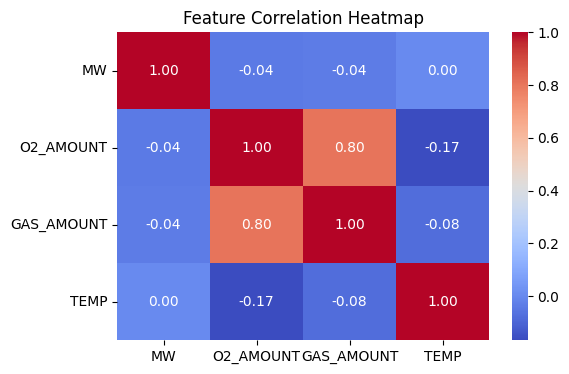

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = merged[['MW', 'O2_AMOUNT', 'GAS_AMOUNT', 'TEMP']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


In [7]:
transformer.to_csv("transformer_cleaned.csv", index=False)
gas.to_csv("gas_cleaned.csv", index=False)
merged.to_csv("merged_cleaned.csv", index=False)

print("All cleaned datasets saved successfully.")


All cleaned datasets saved successfully.


In [8]:
import pandas as pd

transformer = pd.read_csv("data/raw/eaf_transformer.csv")
temp = pd.read_csv("data/raw/eaf_temp.csv")
gas = pd.read_csv("data/raw/eaf_gaslance_mat.csv")


In [9]:
print(transformer.head())
print(temp.head())
print(gas.head())


   TAP  HEATID            STARTTIME DURATION     MW
0   11  6F0020  2016-01-01 18:35:00   00: 29    0,5
1   17  6F0020  2016-01-01 19:04:00   10: 40     16
2   17  6F0020  2016-01-01 18:55:00   03: 00     11
3   17  6F0020  2016-01-01 18:37:00   13: 20  16,75
4   17  6F0020  2016-01-01 18:36:00   00: 40   0,75
   HEATID             DATETIME    TEMP  VALO2_PPM
0  6F0020  2016-01-01 19:15:00  1650.0     1242.0
1  6F0021  2016-01-01 20:05:00  1649.0     1160.0
2  6F0021  2016-01-01 20:05:00  1649.0     1160.0
3  6F0021  2016-01-01 20:03:00  1606.0     1152.0
4  6F0022  2016-01-01 21:03:00  1636.0      947.0
                   REVTIME O2_AMOUNT GAS_AMOUNT   O2_FLOW GAS_FLOW  HEATID
0  2016-01-01 18:31:46,003      0,00       0,00     0,000    0,000  6F0020
1  2016-01-01 18:31:55,925   4555,00     548,00     0,000    0,000  6F0020
2  2016-01-01 18:32:55,972      0,00       0,00     0,000    0,000  6F0020
3  2016-01-01 18:33:05,956      0,00       0,00  2628,000    0,000  6F0020
4  2016-01-01

In [10]:
merged.to_csv("data/cleaned/merged_cleaned.csv", index=False)
